# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) si [matplotlib](https://matplotlib.org/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucram

Vom folosi o imagine din setul de date oferit implicit de catre scipy.

/tmp/ipykernel_20825/866361824.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


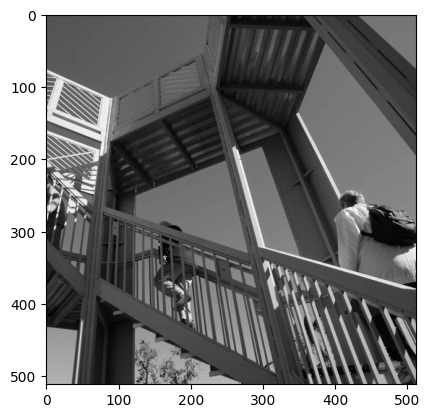

In [3]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ si $n_2$ sunt pozitile pixelilor pe orizontala, respectiv, pe verticala
* bin-urile rezultate corespund pozitiilor pixelilor
* spectrul este in continuare simetric si par
* proprietatile transformatei DCT-II sunt respectate si in cazul celei 2D

In Python avem rutina `scipy.fft.dct` pentru 1D si `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinata automat dupÄ forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

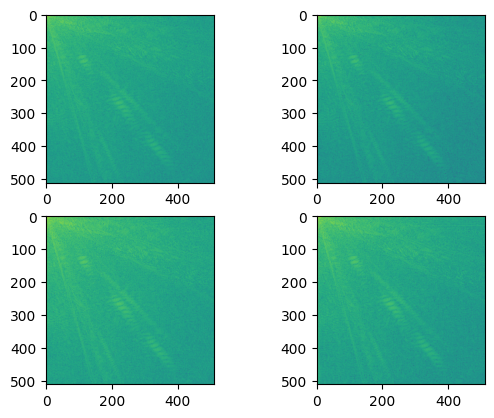

In [4]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecventelor DCT incepand cu *bin*-ul `k` dupa care aplicam transformata DCT inversa (similar cu tema anterioara):

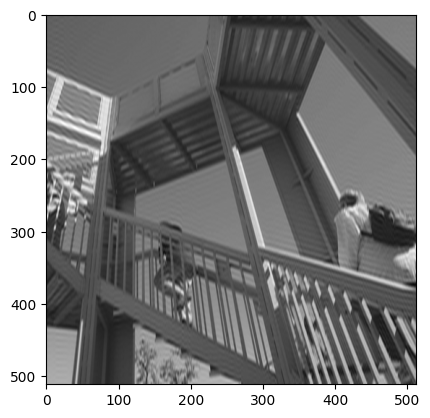

In [5]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB in Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea in frecventa cu $Q$ dat de standardul JPEG
4. compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastra de test este monocroma, deci nu necesita pasul 1, dar putem efectua o operatie de *down-sampling* in preprocesare precum am prezentat la curs.

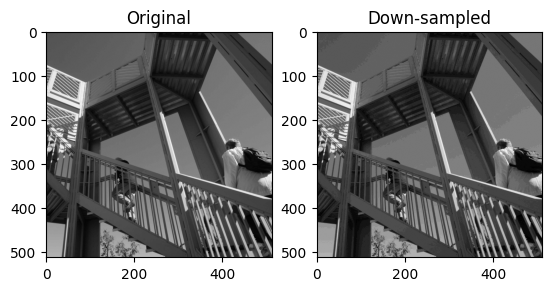

In [6]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down * np.round(X_jpeg / Q_down)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title("Down-sampled")
plt.show()

Pentru fiecare bloc de $8\times 8$ aplicam DCT si cuantizare.

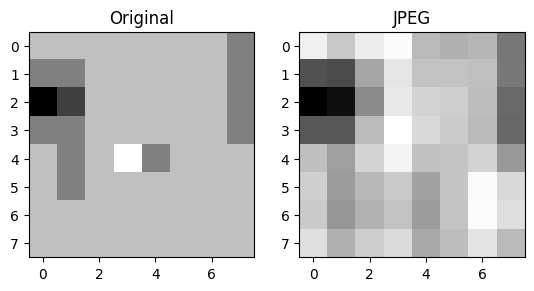

Componente in frecventa:64
Componente in frecventa dupa cuantizare: 14


In [7]:
Q_jpeg = [
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 28, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg * np.round(y / Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title("JPEG")
plt.show()

print(
    "Componente in frecventa:"
    + str(y_nnz)
    + "\nComponente in frecventa dupa cuantizare: "
    + str(y_jpeg_nnz)
)

# Sarcini

1. [6p] Completati algoritmul JPEG incluzand toate blocurile din imagine.

2. [4p] Extindeti la imagini color (incluzand transformarea din RGB in Y'CbCr).

3. [6p] Extindeti algoritmul pentru compresia imaginii pana la un prag MSE impus de utilizator.

4. [4p] Extindeti algoritmul pentru compresie video. Demonstrati pe un clip scurt din care luati fiecare cadru si il tratati ca pe o imagine.